In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import digamma
from sklearn.neighbors import KDTree, BallTree
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import numpy.linalg as la
from numpy import log
from scipy.special import digamma
from sklearn.neighbors import BallTree, KDTree
import sklearn

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def reset():
    f =  ['AMG', 'CAR', 'CF1', 'CF3', 'CF4',
            'Others', 'GLI', 'LIN', 'LIP', 'MAC', 'NTI', 'OXA', 'PAP', 'PEN', 'POL',
            'QUI', 'SUL', 'hoursVM', 'acinet.$_{pc}$', 'enterobac.$_{pc}$', 'enteroc.$_{pc}$',
            'pseud.$_{pc}$', 'staph.$_{pc}$', 'others.$_{pc}$', 'hoursICU',
            '# pat_atb', '# pat_MR',
            'CAR.$_{n}$', 'PAP.$_{n}$', 'Falta.$_{n}$', 'QUI.$_{n}$',
            'OXA.$_{n}$', 'PEN.$_{n}$', 'CF3.$_{n}$', 'GLI.$_{n}$',
            'CF4.$_{n}$', 'SUL.$_{n}$', 'NTI.$_{n}$', 'LIN.$_{n}$',
            'AMG.$_{n}$', 'MAC.$_{n}$', 'CF1.$_{n}$', 'POL.$_{n}$',
            'LIP.$_{n}$', '# pat_ttl','posture.$_{change}$',
            'insulin', 'nutr_art', 'sedation', 'relax', 'hep_fail',
            'renal_fail', 'coag_fail', 'hemo_fail',
            'resp_fail', 'multi_fail', 'n_transf',
            'vasoactive.$_{drug}$', 'dosis_nems', 'hoursTracheo', 'hoursUlcer',
            'hoursHemo', 'C01 PIVC 1',
            'C01 PIVC 2', 'C02 CVC - YD',
            'C02 CVC - SD', 'C02 CVC - SI', 'C02 CVC - FD',
            'C02 CVC - YI', 'C02 CVC - FI', '# catheters']

    tf =  ['discreta', 'discreta', 'discreta', 'discreta', 'discreta', 
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta',
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta',
                        'discreta', 'discreta', 'continua', 'discreta',  
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta', 'continua',
                        'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'discreta', 'discreta',
                        'discreta', 'discreta', 'discreta', 'discreta', 'discreta',
                        'discreta', 'discreta', 'discreta',
                        'discreta', 'continua', 'discreta', 'continua',
                        'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua', 'continua', 'continua',
                        'continua', 'continua', 'continua','continua']
    
    return f, tf

def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
    
def plot_dataframe(df, path):
    features, tipos_variables = reset()
    
    reordered_df = pd.DataFrame()  # Empty DataFrame to store the rearranged rows
    for i in range(0, len(df), len(features)):
        group = df.iloc[i:i+len(features)]  # Obtain the group of rows
        reordered_group = group.set_index('Feature').reindex(features).reset_index()  # Reorder rows based on characteristics
        if i == 0:
            reordered_df = pd.concat([reordered_df, reordered_group])  # Concatenate the reorganized group to the final DataFrame
        else:
            reordered_df = pd.concat([reordered_df, reordered_group[['MI Value']]], axis=1)  # Concatenate the reorganized group to the final DataFrame
    
    reordered_df = reordered_df.drop(["Feature"], axis=1)
    reordered_df.columns = np.arange(0, reordered_df.shape[1], 1)

    scaler = MinMaxScaler()
    reordered_df = pd.DataFrame(scaler.fit_transform(reordered_df), columns=reordered_df.columns)
    
    feature_idx = {feature: idx for idx, feature in enumerate(features)}
    reordered_indices = [feature_idx[feature] for feature in new_order]
    reordered_data = reordered_df.iloc[reordered_indices, :]
    
    final_order = ['AMG', 'CAR', 'CF1', 'CF3', 'CF4',
            'Others', 'GLI', 'LIN', 'LIP', 'MAC', 'NTI', 'OXA', 'PAP', 'PEN', 'POL',
            'QUI', 'SUL','# pat$_{atb}$', '# pat$_{MDR}$', '# pat$_{tot}$', 'CAR$_{n}$', 'PAP$_{n}$', 
            'Others$_{n}$', 'QUI$_{n}$',
            'OXA$_{n}$', 'PEN$_{n}$', 'CF3$_{n}$', 'GLI$_{n}$',
            'CF4$_{n}$', 'SUL$_{n}$', 'NTI$_{n}$', 'LIN$_{n}$',
            'AMG$_{n}$', 'MAC$_{n}$', 'CF1$_{n}$', 'POL$_{n}$',
            'LIP$_{n}$', 'Acinet$_{pc}$', 'Enterobac$_{pc}$', 'Enteroc$_{pc}$',
            'Pseud$_{pc}$', 'Staph$_{pc}$', 'Others$_{pc}$',
            'Post change',
            'Insulin', 'Art nutrition', 'Sedation', 'Relax', 'MV hours', 'Respiratory$_{fail}$','Hepatic$_{fail}$',
            'Renal$_{fail}$', 'Coagulation$_{fail}$', 'Hemodynamic$_{fail}$',
            'Multiorganic$_{fail}$', '# transfusions',
            'Vasoactive drug', 'Dosis nems', 'Tracheo hours', 'Ulcer hours',
            'Hemo hours', 'ICU hours', 'C01 PICC 1',
            'C01 PICC 2', 'C02 CVC - RJ',
            'C02 CVC - RS', 'C02 CVC - LS', 'C02 CVC - RF',
            'C02 CVC - LJ', 'C02 CVC - LF', '# catheters' ]
    
    plt.figure(figsize=(11,22))
    ax = plt.gca()
    heatmap = sns.heatmap(reordered_data, cmap='viridis', yticklabels=final_order, xticklabels=range(1,15), ax=ax, cbar=False)
    
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=22)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=22, rotation=90)

    # Create colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = heatmap.figure.colorbar(heatmap.collections[0], cax=cax)
    cbar.ax.tick_params(labelsize=22)

    # Set custom ticks on the colorbar
    num_ticks = 11
    tick_locs = np.linspace(reordered_data.values.min(), reordered_data.values.max(), num_ticks)
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels([f'{tick:.2f}' for tick in tick_locs])
    cbar.ax.tick_params(labelsize=22)

    plt.tight_layout(pad=0)
    plt.savefig(path, bbox_inches='tight', pad_inches=0)

    plt.show()

# VISUALIZATION

In [3]:
new_order = ['AMG', 'CAR', 'CF1', 'CF3', 'CF4',
            'Others', 'GLI', 'LIN', 'LIP', 'MAC', 'NTI', 'OXA', 'PAP', 'PEN', 'POL',
            'QUI', 'SUL','# pat_atb', '# pat_MR', '# pat_ttl', 'CAR.$_{n}$', 'PAP.$_{n}$', 'Falta.$_{n}$', 'QUI.$_{n}$',
            'OXA.$_{n}$', 'PEN.$_{n}$', 'CF3.$_{n}$', 'GLI.$_{n}$',
            'CF4.$_{n}$', 'SUL.$_{n}$', 'NTI.$_{n}$', 'LIN.$_{n}$',
            'AMG.$_{n}$', 'MAC.$_{n}$', 'CF1.$_{n}$', 'POL.$_{n}$',
            'LIP.$_{n}$', 'acinet.$_{pc}$', 'enterobac.$_{pc}$', 'enteroc.$_{pc}$',
            'pseud.$_{pc}$', 'staph.$_{pc}$', 'others.$_{pc}$',
            'posture.$_{change}$',
            'insulin', 'nutr_art', 'sedation', 'relax', 'hoursVM', 'resp_fail','hep_fail',
            'renal_fail', 'coag_fail', 'hemo_fail',
            'multi_fail', 'n_transf',
            'vasoactive.$_{drug}$', 'dosis_nems', 'hoursTracheo', 'hoursUlcer',
            'hoursHemo', 'hoursICU', 'C01 PIVC 1',
            'C01 PIVC 2', 'C02 CVC - YD',
            'C02 CVC - SD', 'C02 CVC - SI', 'C02 CVC - FD',
            'C02 CVC - YI', 'C02 CVC - FI', '# catheters']

# MDR

In [4]:
import pickle
split_directory = './Results-App1/'

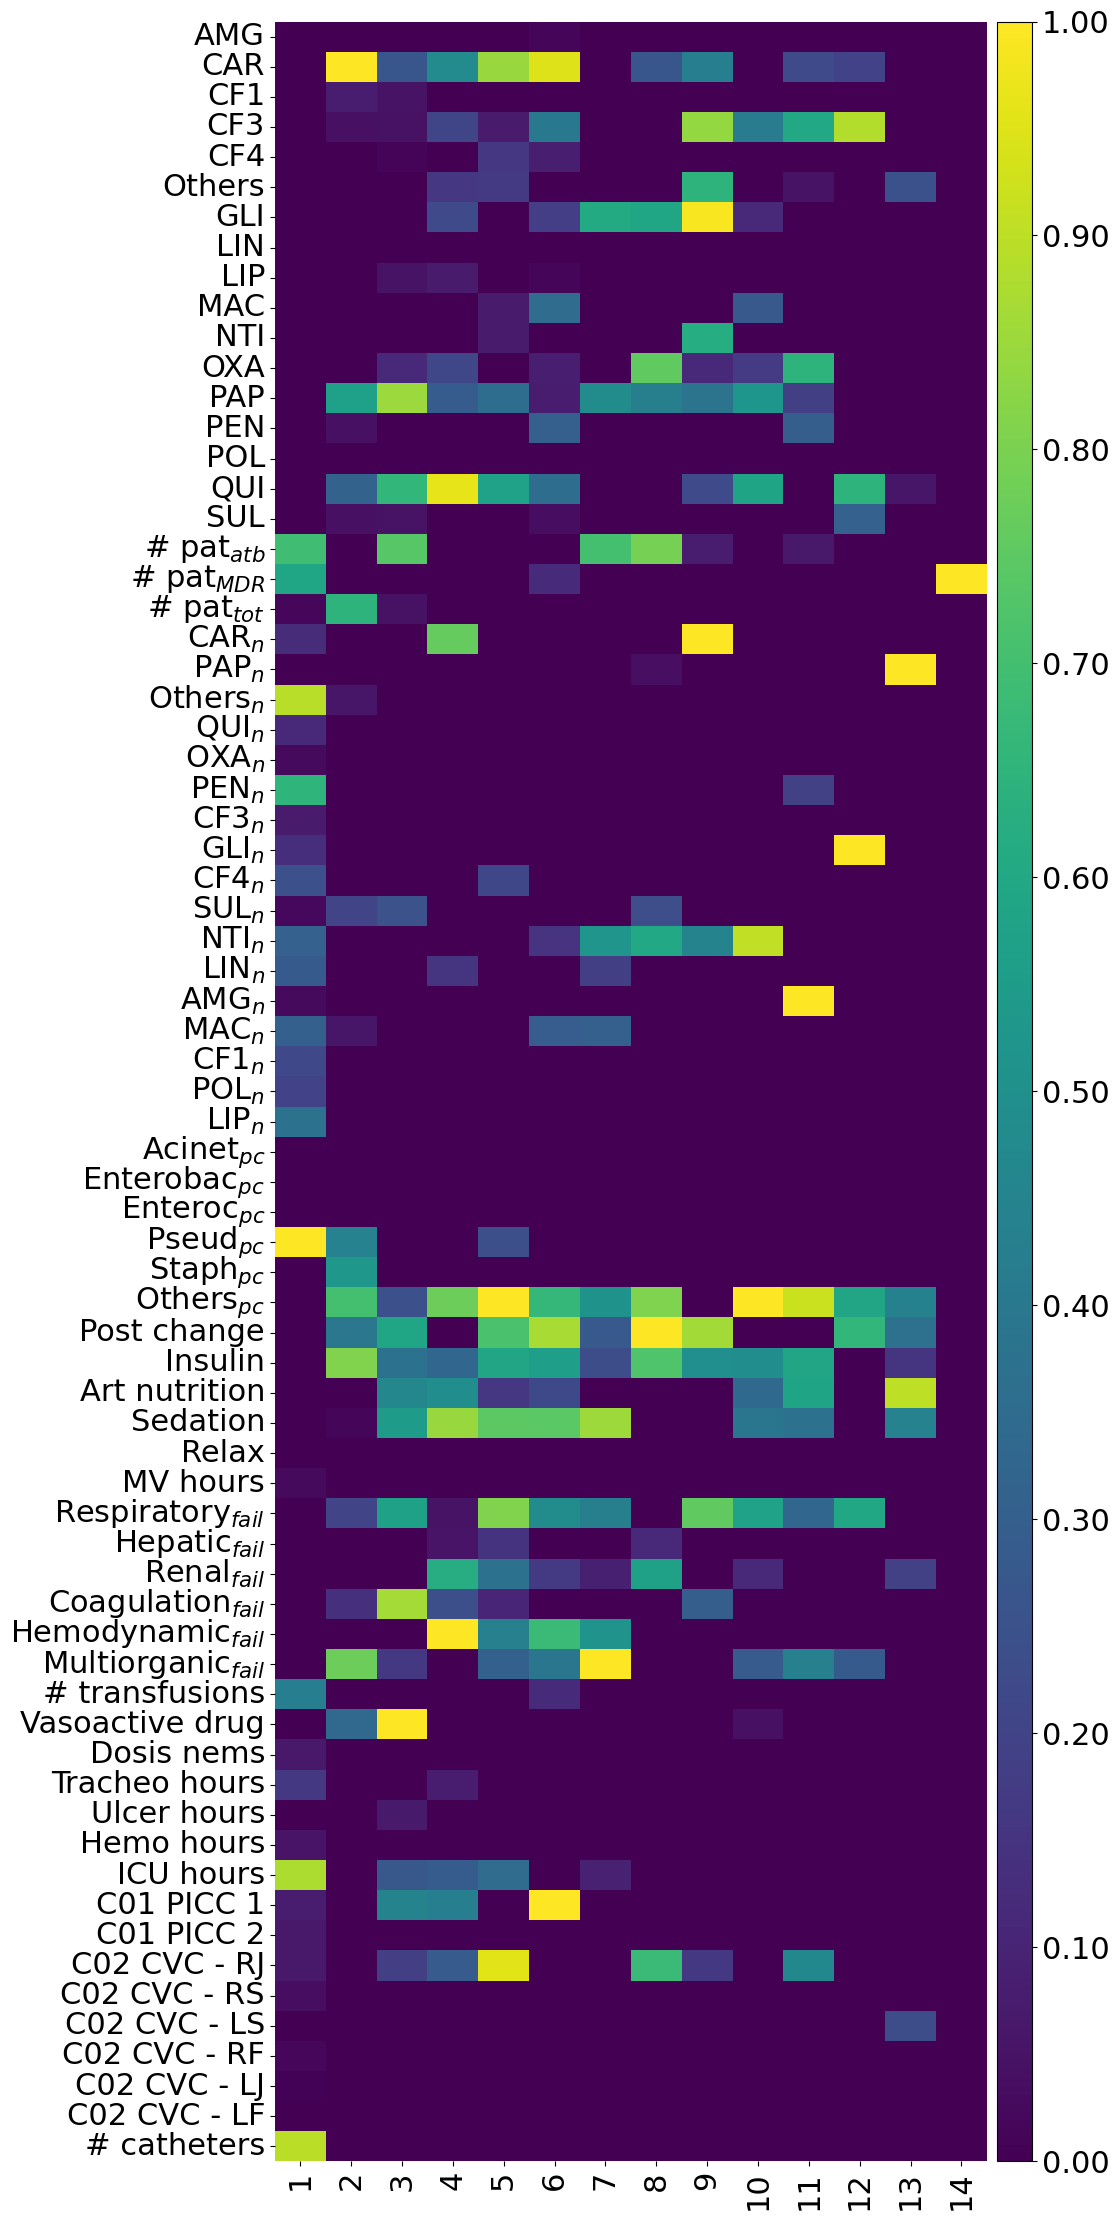

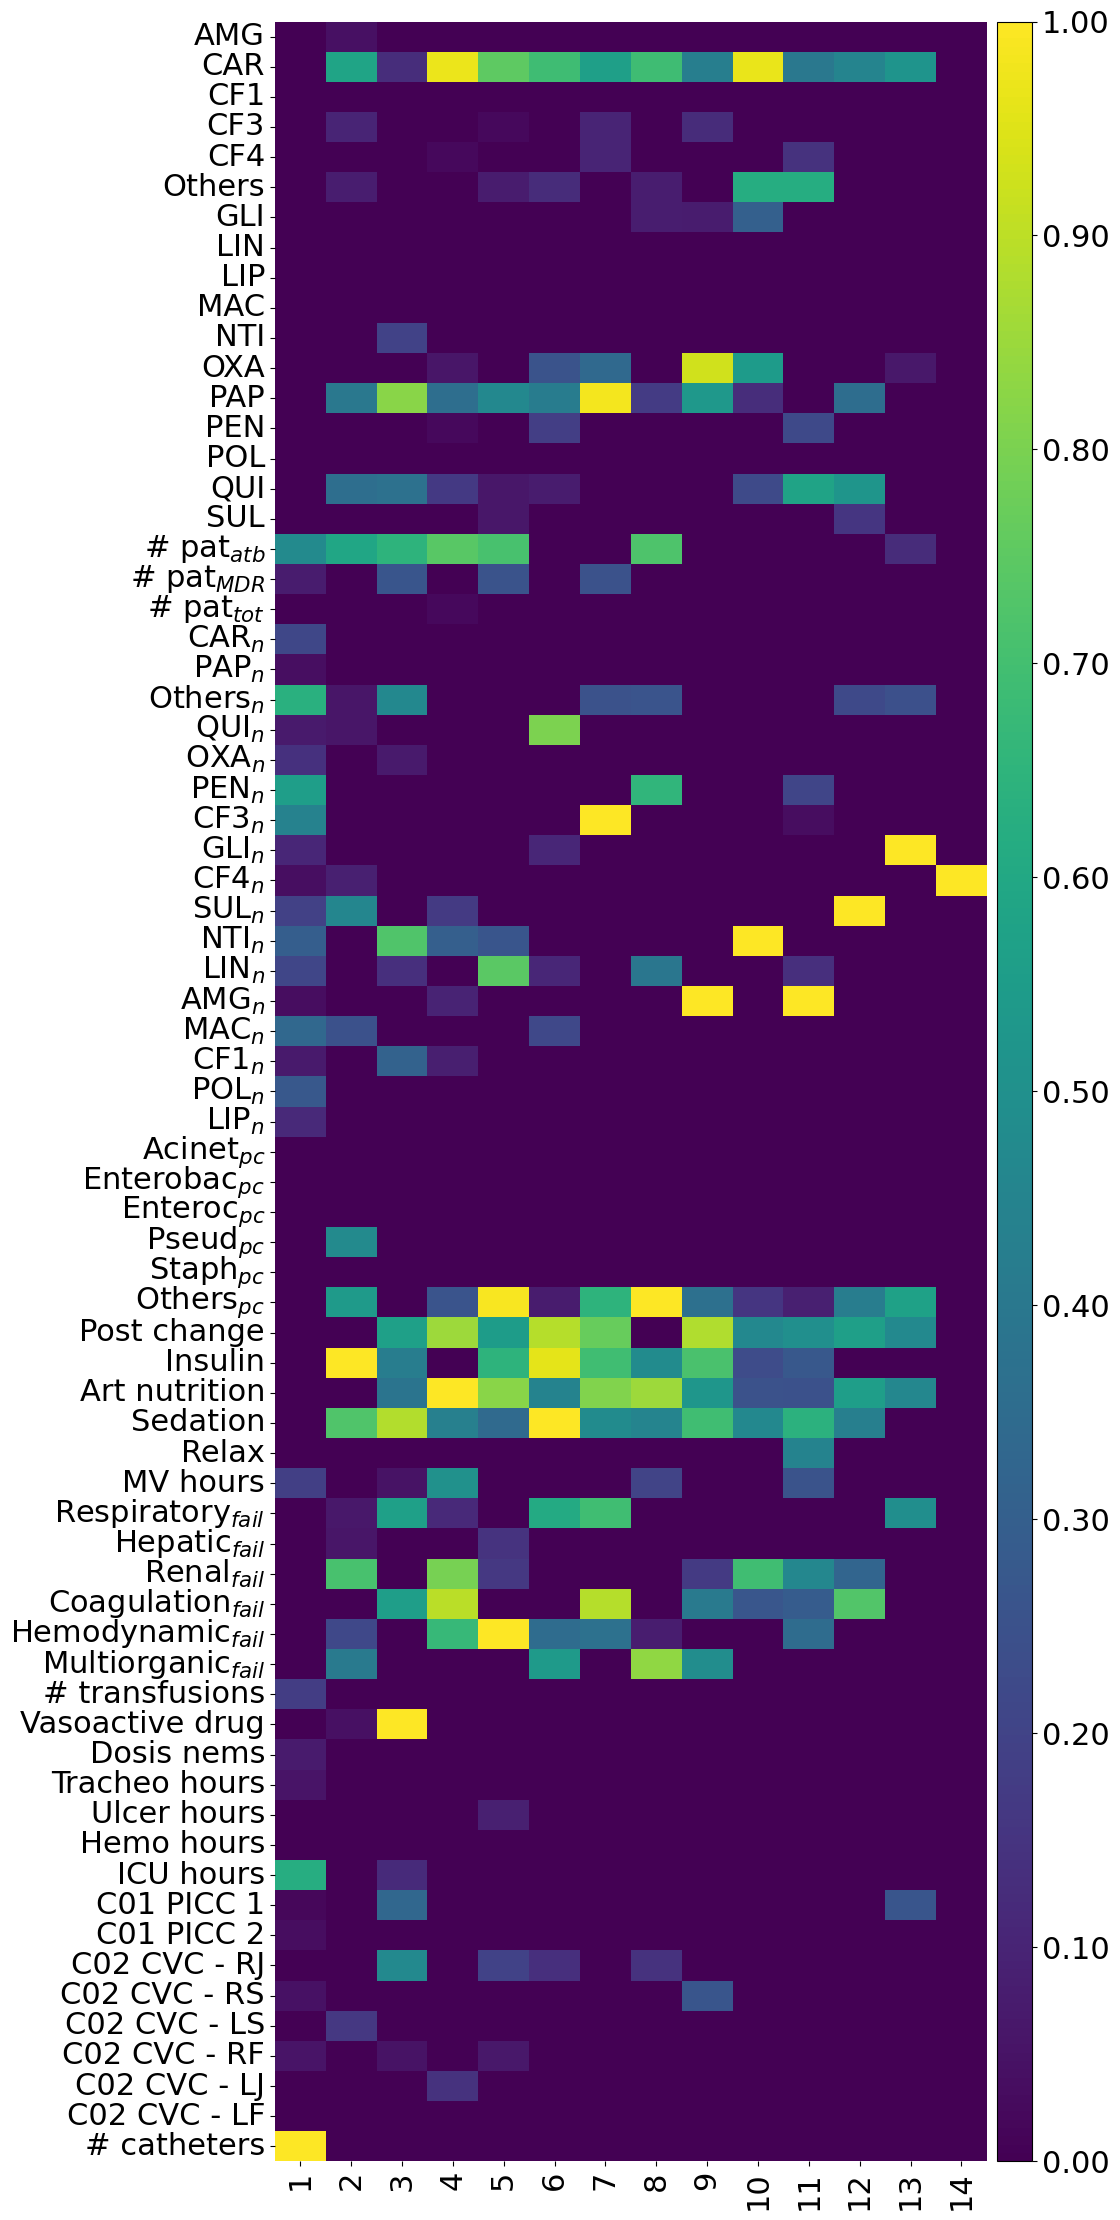

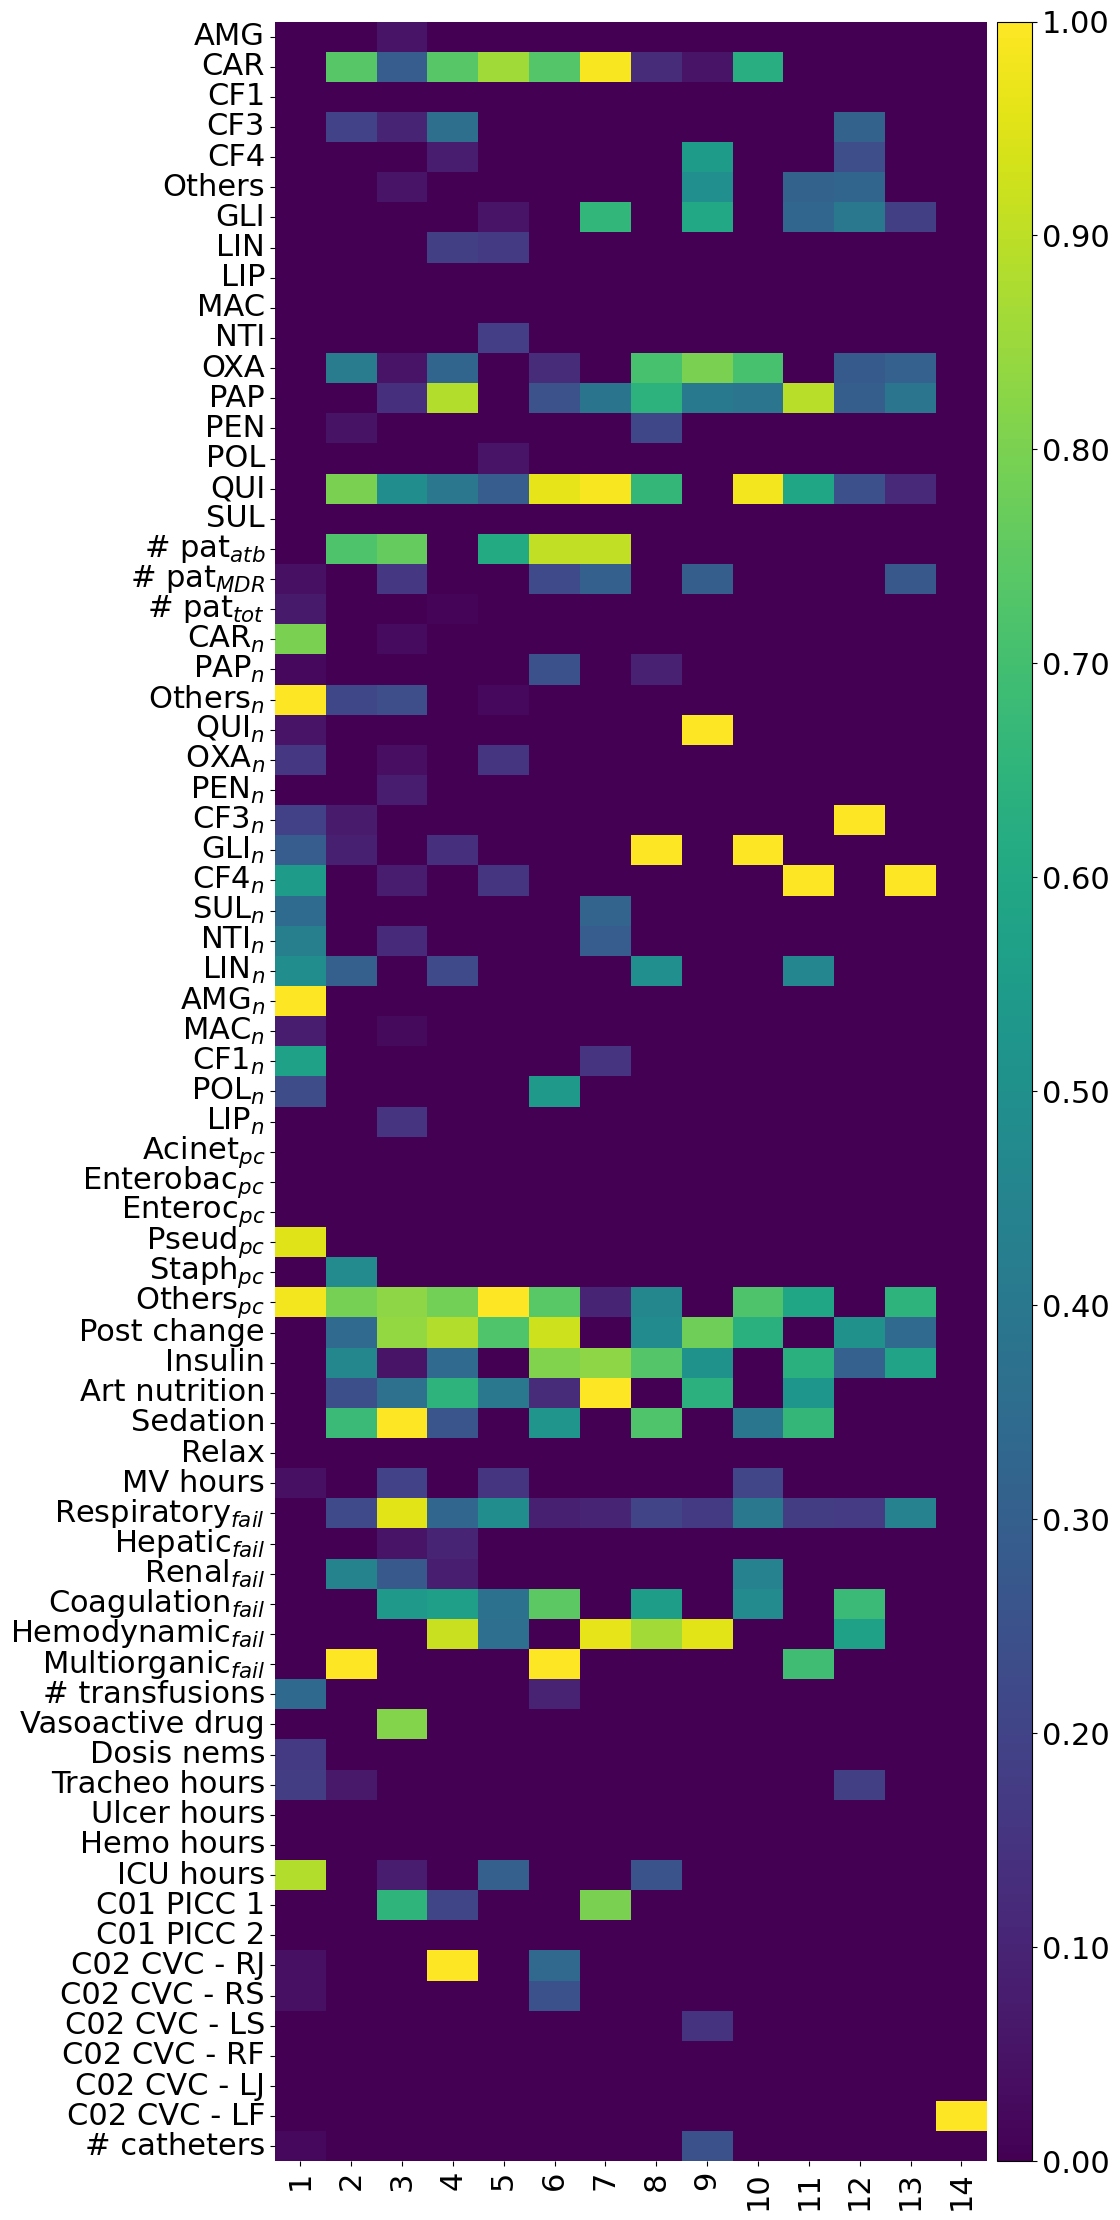

In [5]:
results_amr = load_from_pickle(os.path.join(split_directory, f"CMI_results_mdr.pkl"))
for split in [1,2,3]:
    df = results_amr[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures/PRE-HOC/CMI-S{split}_mdr.pdf')

# Non MDR

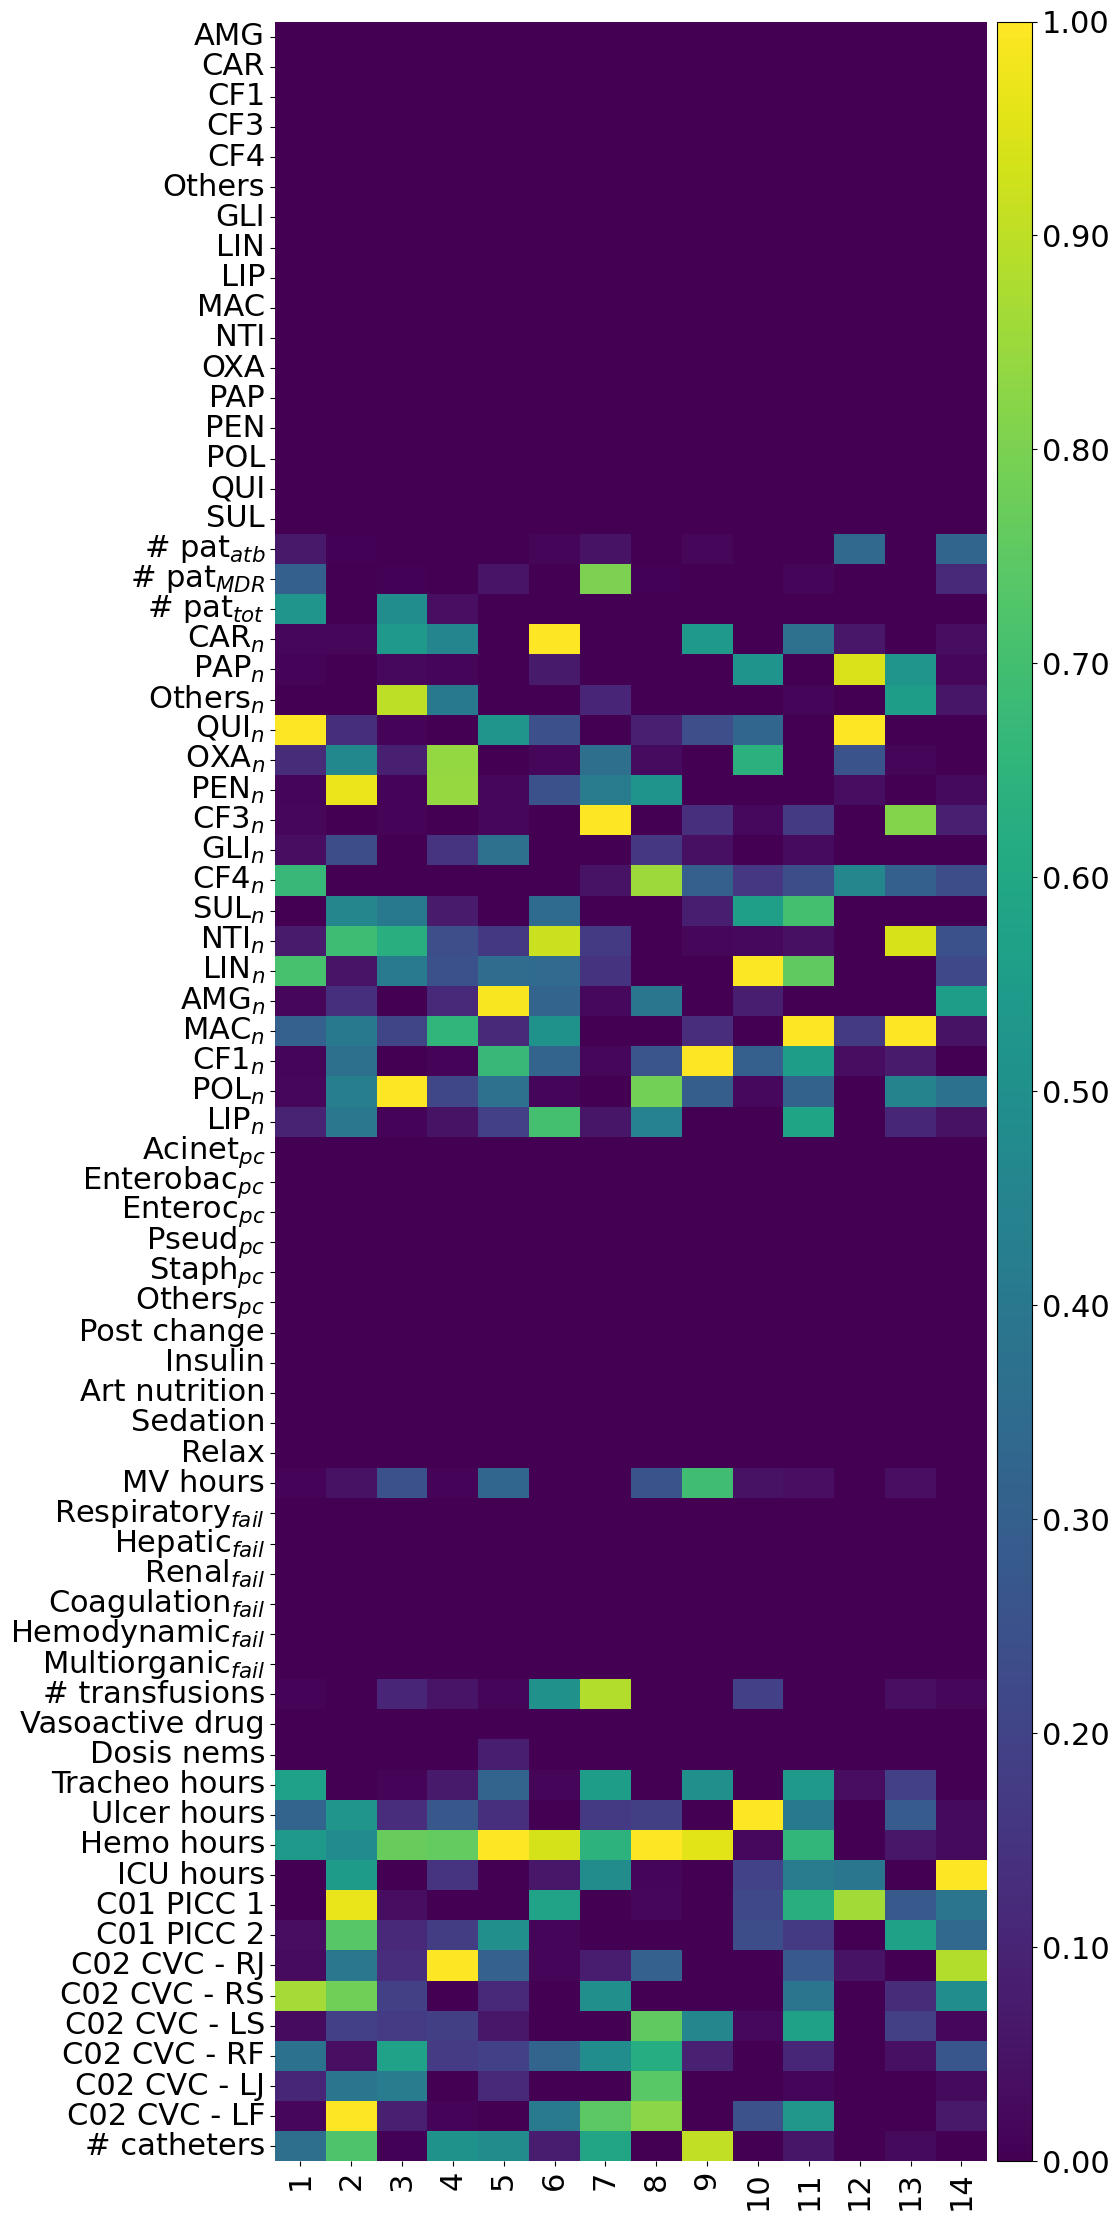

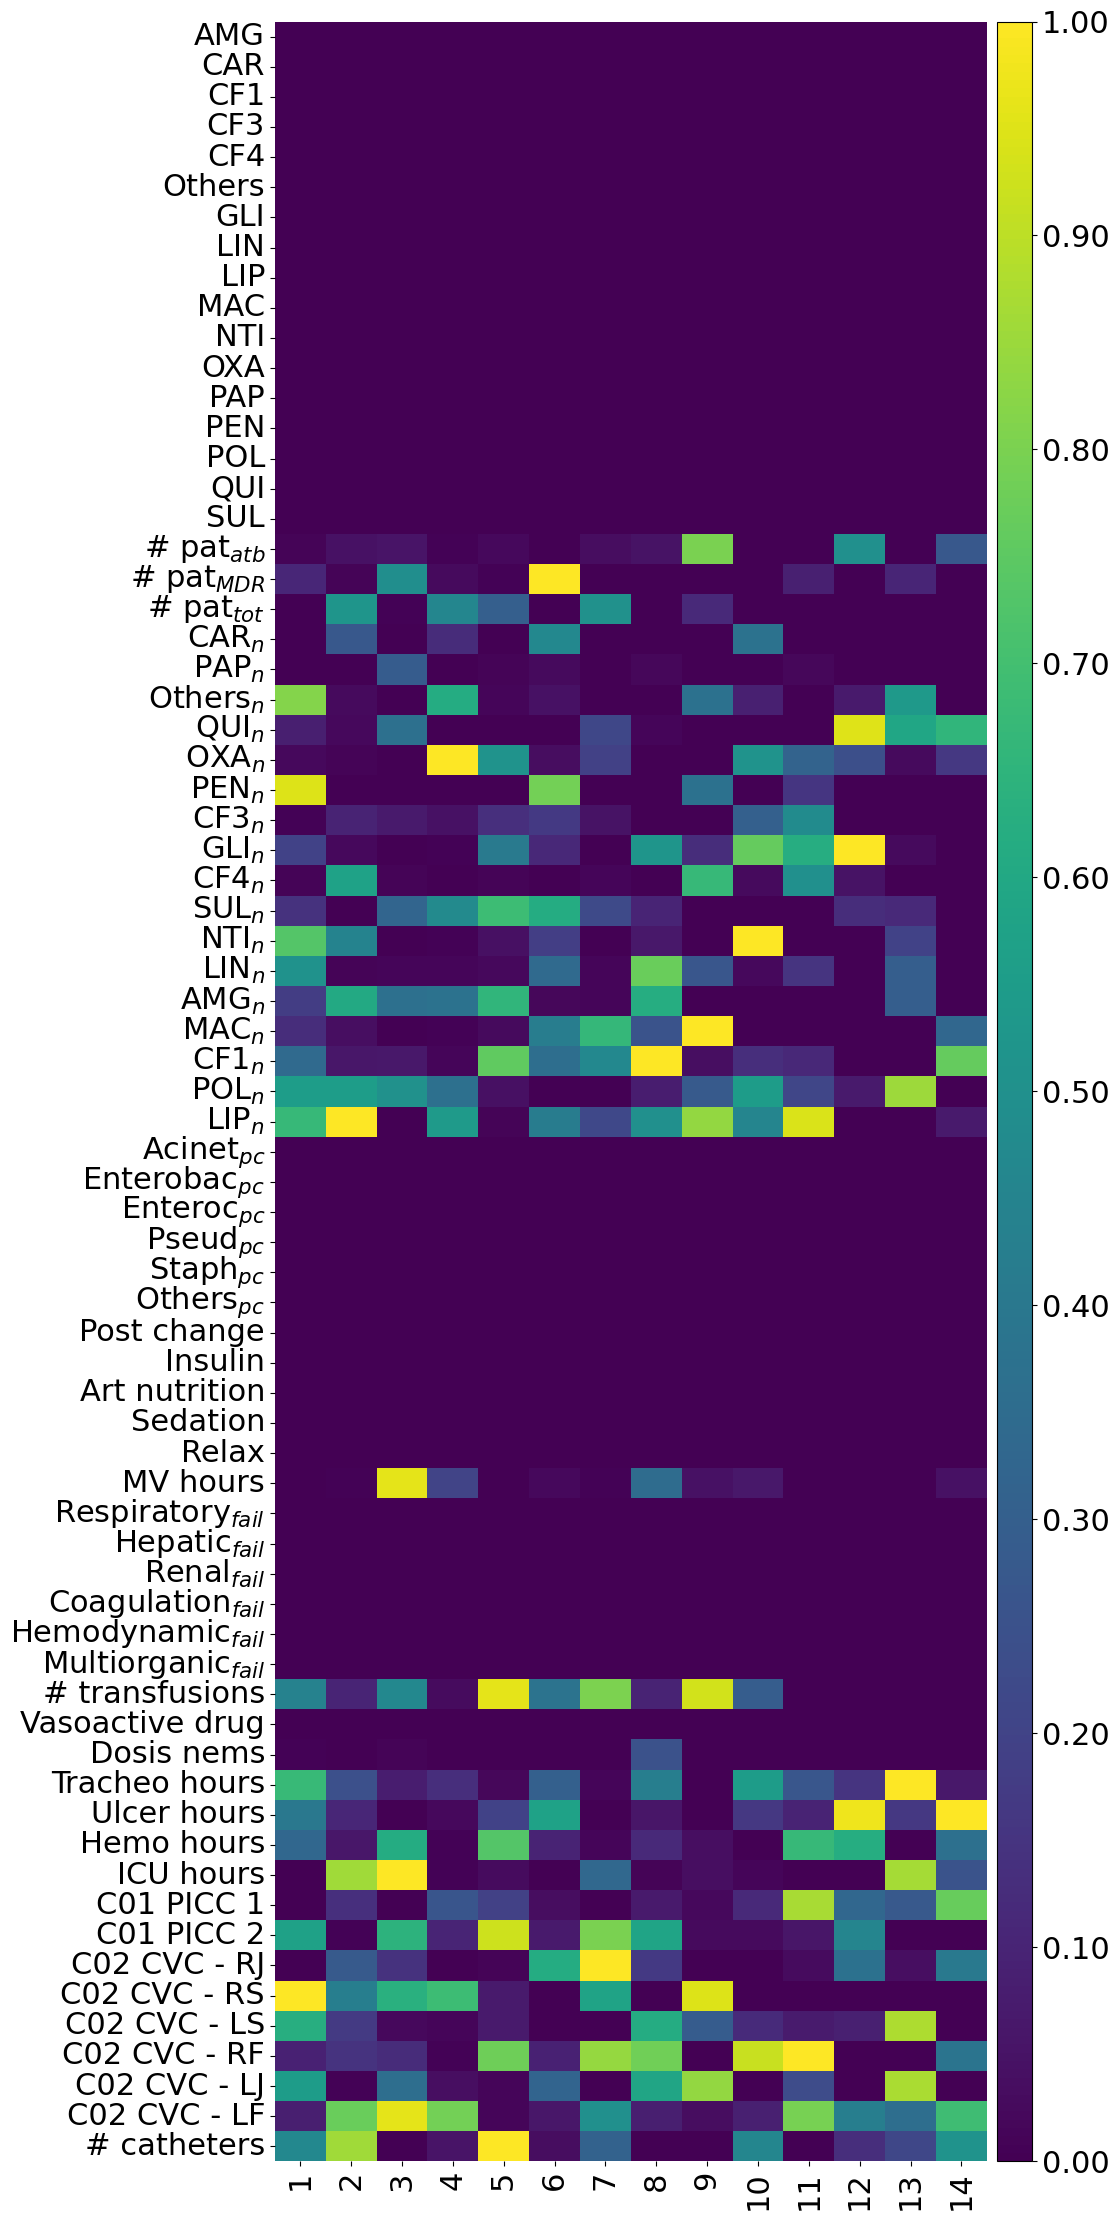

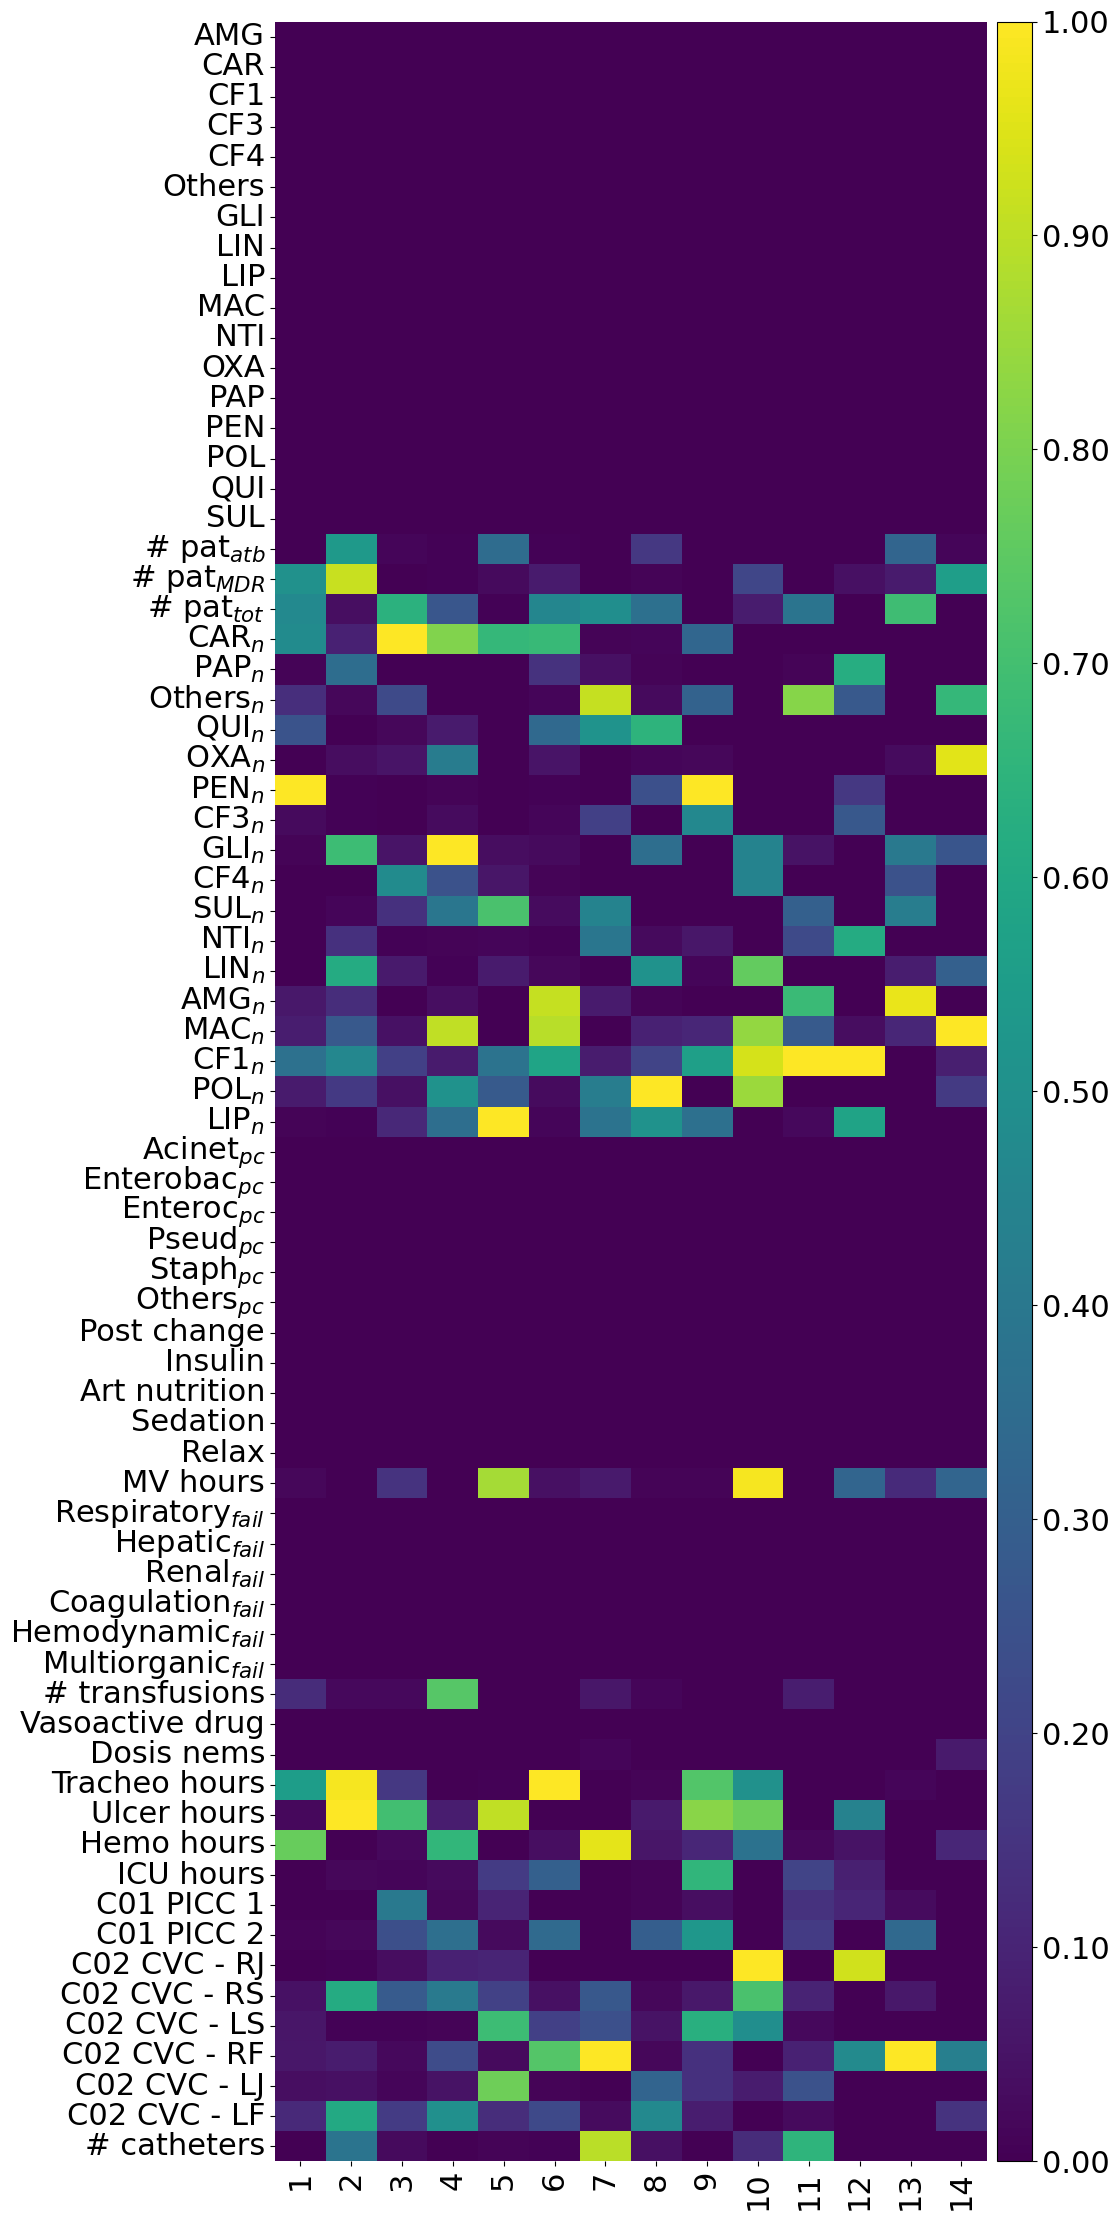

In [6]:
results_noamr = load_from_pickle(os.path.join(split_directory, f"CMI_results_nomdr.pkl"))
for split in [1,2,3]:  
    df = results_noamr[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures/PRE-HOC/CMI-S{split}_nomdr.pdf')
    

## Population analysis

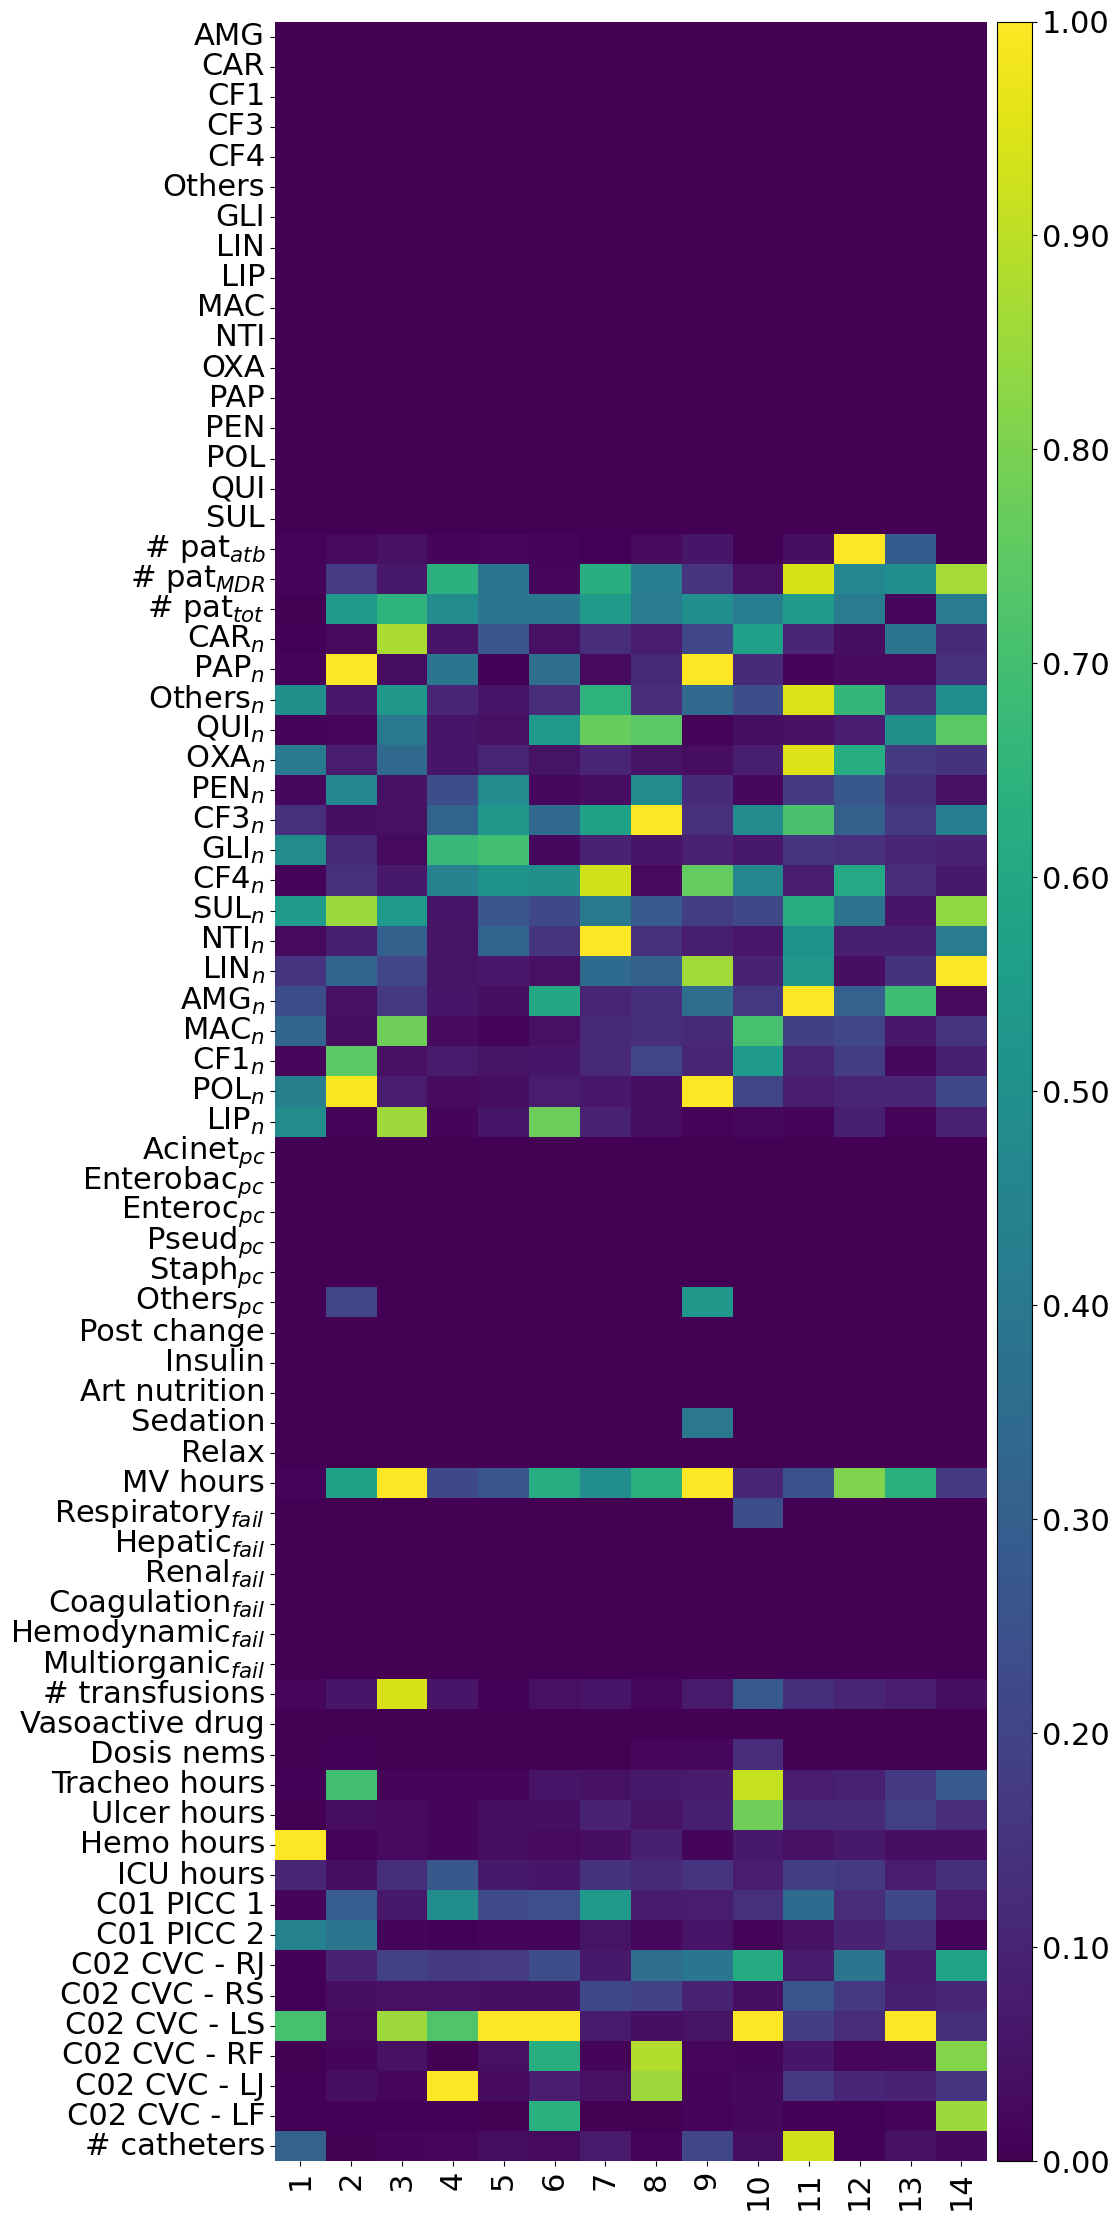

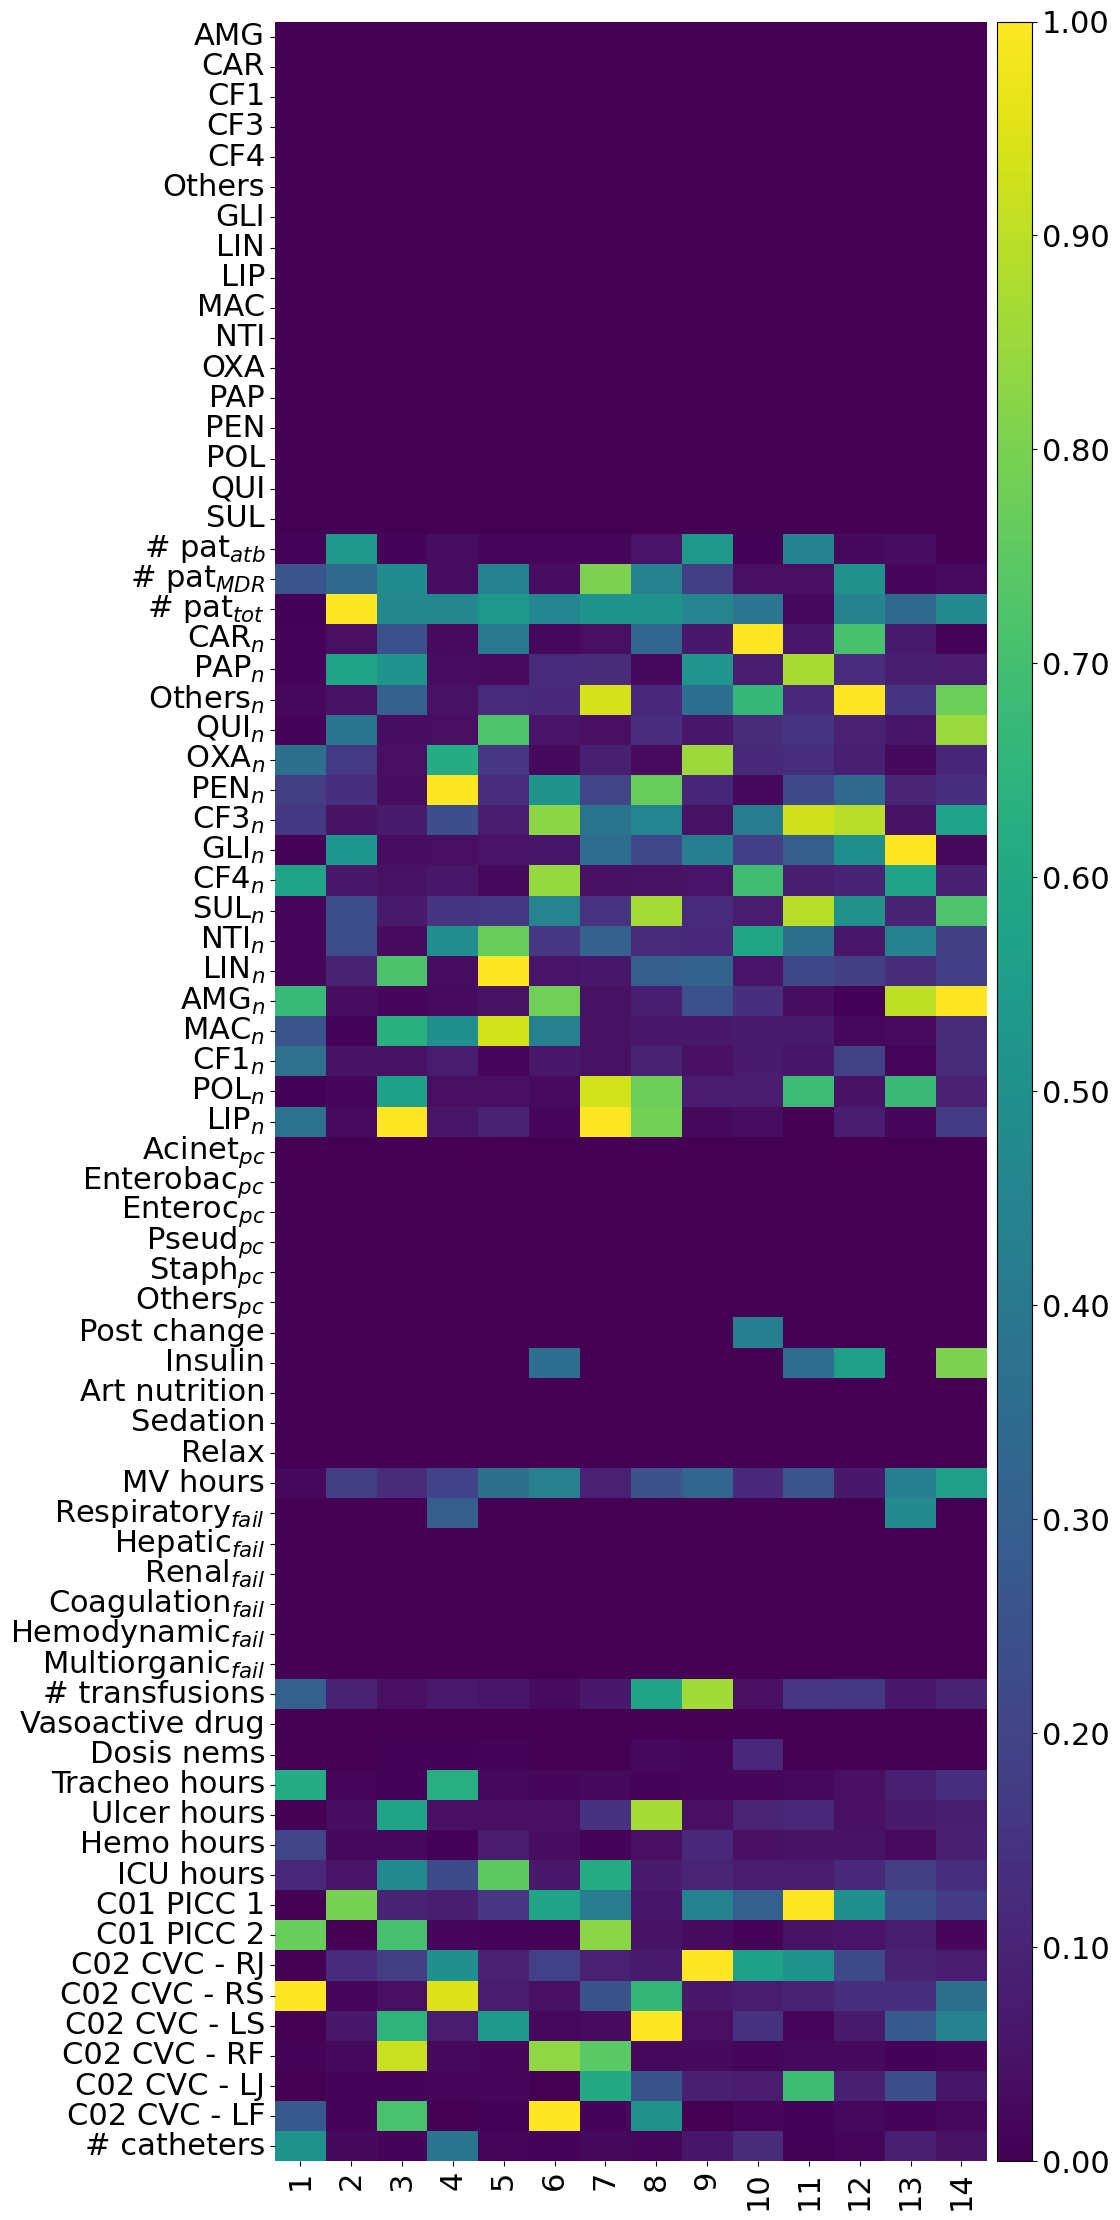

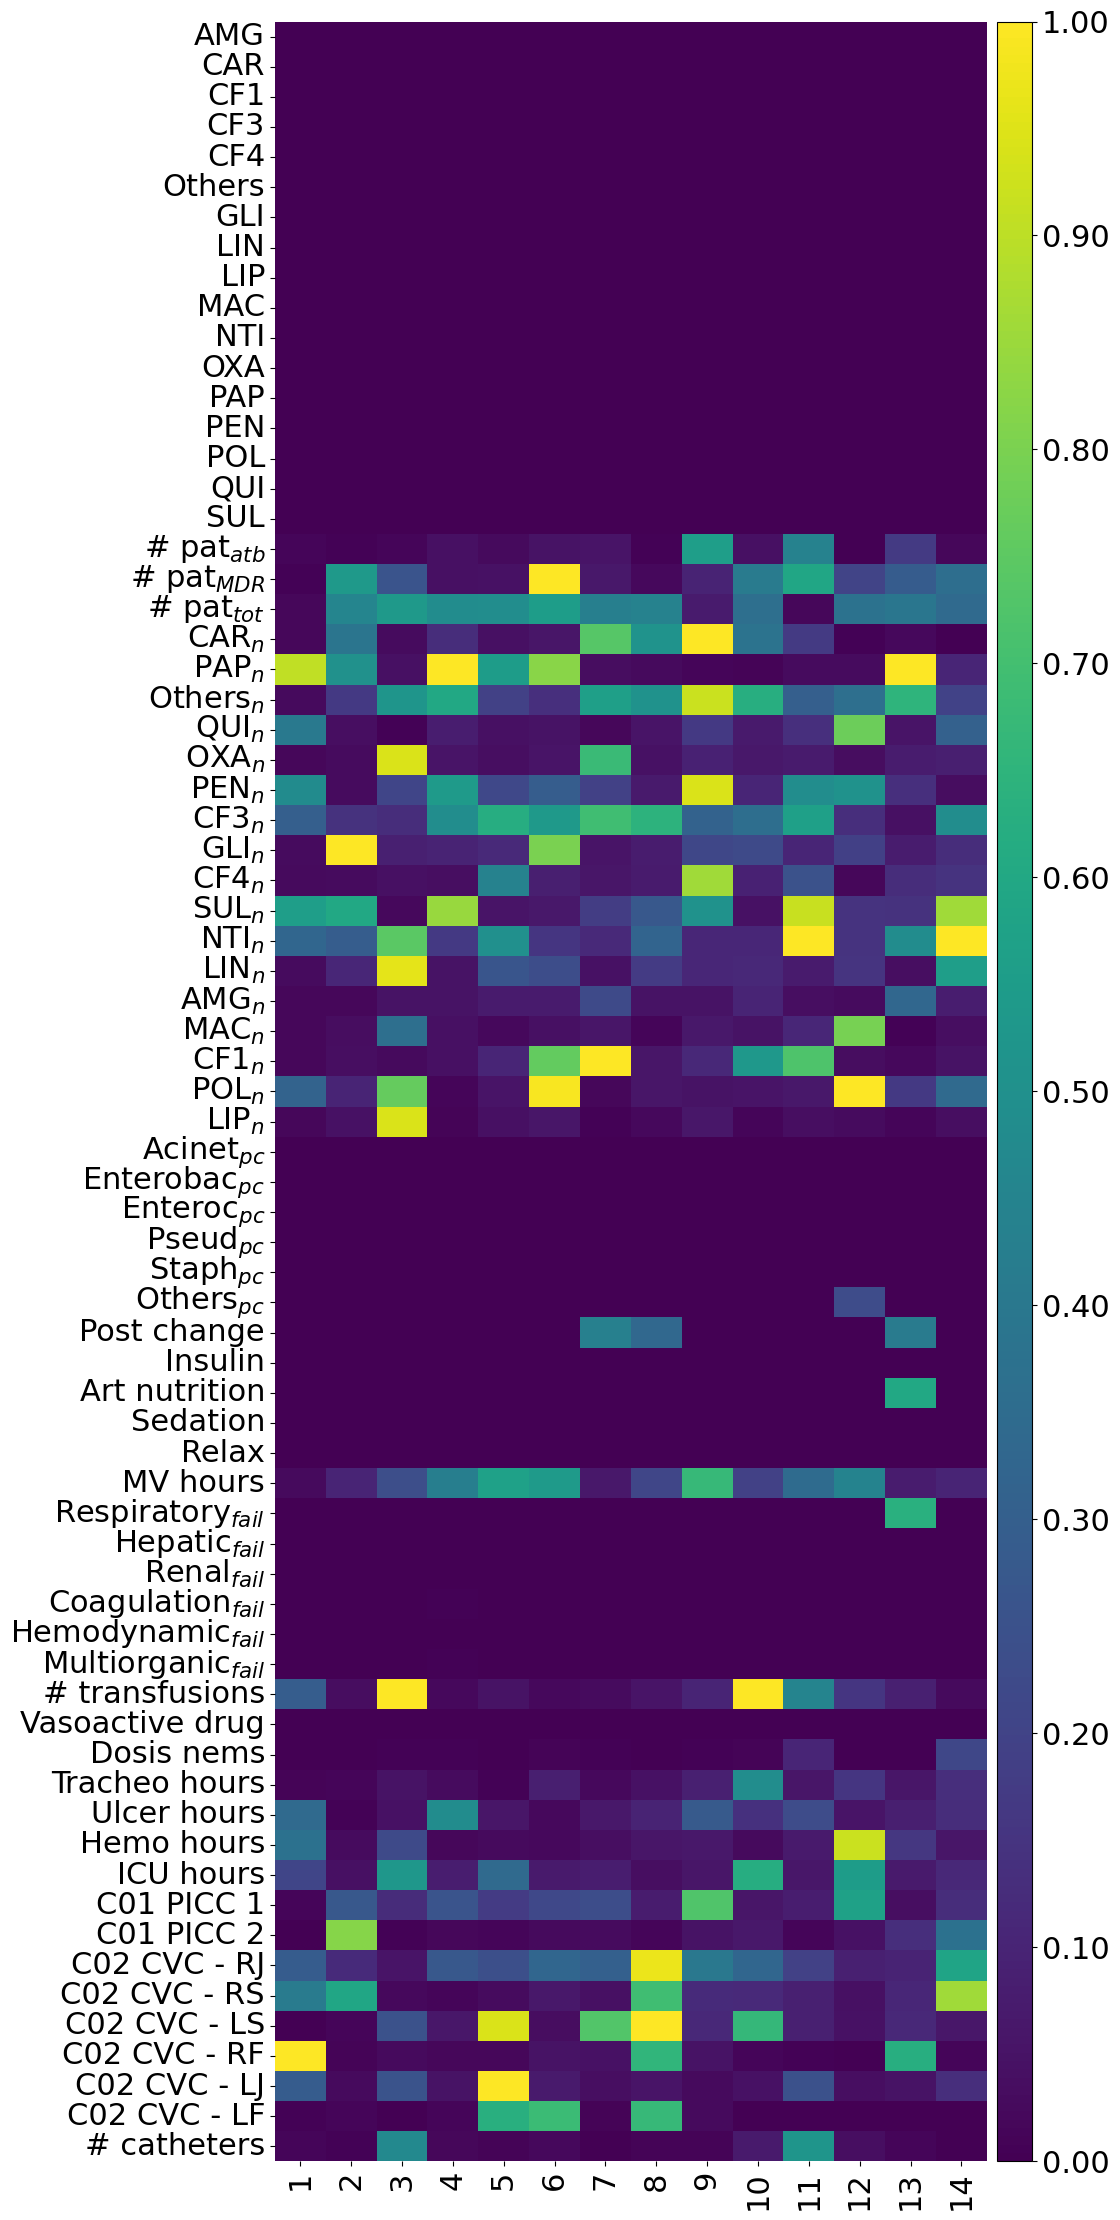

In [7]:
results_pop = load_from_pickle(os.path.join(split_directory, f"CMI_results_population.pkl"))
for split in [1,2,3]:
    df = results_pop[f'results_df_{split}']
    df.replace([np.inf, -np.inf], 0, inplace=True)
    plot_dataframe(df, f'../Figures/PRE-HOC/CMI-S{split}-Population.jpg')

In [8]:
def calculate_mean_mi(df):
    return df.groupby('Feature')['MI Value'].mean().reset_index()

mean_mi_df1 = calculate_mean_mi(results_pop['results_df_1'])
mean_mi_df2 = calculate_mean_mi(results_pop['results_df_2'])
mean_mi_df3 = calculate_mean_mi(results_pop['results_df_3'])

# Define the threshold
threshold = 0.04

# Check if each variable exceeds the threshold in each DataFrame and store results in a dictionary
dfs = [mean_mi_df1, mean_mi_df2, mean_mi_df3]
threshold_votes = {}

for df in dfs:
    for feature, value in zip(df['Feature'], df['MI Value']):
        if feature not in threshold_votes:
            threshold_votes[feature] = 0
        if value > threshold:
            threshold_votes[feature] += 1

# Select variables that exceed the threshold in at least two DataFrames
selected_features = [feature for feature, votes in threshold_votes.items() if votes >= 2]

# Print the selected features
print("Variables selected by majority vote:")
print(selected_features)


Variables selected by majority vote:
['# pat_MR', '# pat_ttl', 'AMG.$_{n}$', 'C01 PIVC 1', 'C02 CVC - FD', 'C02 CVC - SD', 'C02 CVC - SI', 'C02 CVC - YD', 'CAR.$_{n}$', 'CF3.$_{n}$', 'CF4.$_{n}$', 'Falta.$_{n}$', 'GLI.$_{n}$', 'LIN.$_{n}$', 'LIP.$_{n}$', 'MAC.$_{n}$', 'NTI.$_{n}$', 'OXA.$_{n}$', 'PAP.$_{n}$', 'PEN.$_{n}$', 'POL.$_{n}$', 'QUI.$_{n}$', 'SUL.$_{n}$', 'hoursICU', 'hoursVM', 'n_transf']


In [9]:
import os
import numpy as np
import shutil  

# Relevant features for selection
relevant_features = ['# pat_MR', '# pat_ttl', 'AMG.$_{n}$', 'C01 PIVC 1', 'C02 CVC - FD',
                     'C02 CVC - SD', 'C02 CVC - SI', 'C02 CVC - YD', 'CAR.$_{n}$', 
                     'CF3.$_{n}$', 'CF4.$_{n}$', 'Falta.$_{n}$', 'GLI.$_{n}$', 
                     'LIN.$_{n}$', 'LIP.$_{n}$', 'MAC.$_{n}$', 'NTI.$_{n}$', 
                     'OXA.$_{n}$', 'PAP.$_{n}$', 'PEN.$_{n}$', 'POL.$_{n}$', 
                     'QUI.$_{n}$', 'SUL.$_{n}$', 'hoursICU', 'hoursVM', 'n_transf']

# All available features in the dataset
all_features = ['AMG', 'CAR', 'CF1', 'CF3', 'CF4', 'Others', 'GLI', 'LIN', 'LIP', 
                'MAC', 'NTI', 'OXA', 'PAP', 'PEN', 'POL', 'QUI', 'SUL', 'hoursVM', 
                'acinet.$_{pc}$', 'enterobac.$_{pc}$', 'enteroc.$_{pc}$', 
                'pseud.$_{pc}$', 'staph.$_{pc}$', 'others.$_{pc}$', 'hoursICU',
                '# pat_atb', '# pat_MR', 'CAR.$_{n}$', 'PAP.$_{n}$', 'Falta.$_{n}$', 
                'QUI.$_{n}$', 'OXA.$_{n}$', 'PEN.$_{n}$', 'CF3.$_{n}$', 'GLI.$_{n}$', 
                'CF4.$_{n}$', 'SUL.$_{n}$', 'NTI.$_{n}$', 'LIN.$_{n}$', 'AMG.$_{n}$', 
                'MAC.$_{n}$', 'CF1.$_{n}$', 'POL.$_{n}$', 'LIP.$_{n}$', '# pat_ttl', 
                'posture.$_{change}$', 'insulin', 'nutr_art', 'sedation', 'relax', 
                'hep_fail', 'renal_fail', 'coag_fail', 'hemo_fail', 'resp_fail', 
                'multi_fail', 'n_transf', 'vasoactive.$_{drug}$', 'dosis_nems', 
                'hoursTracheo', 'hoursUlcer', 'hoursHemo', 'C01 PIVC 1', 'C01 PIVC 2', 
                'C02 CVC - YD', 'C02 CVC - SD', 'C02 CVC - SI', 'C02 CVC - FD', 
                'C02 CVC - YI', 'C02 CVC - FI', '# catheters']

# Getting indices of the relevant features from the all_features list
relevant_indices = [all_features.index(feature) for feature in relevant_features]

# Directories for input and output
input_dir = "../../../DATA/MDR"
output_dir = os.path.join(input_dir, "FS_CMI")
os.makedirs(output_dir, exist_ok=True)

# Subfolders (e.g., s1, s2, s3) in the input directory
subfolders = ["s1", "s2", "s3"]

# Process each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(input_dir, subfolder)
    
    if os.path.exists(subfolder_path):
        print(f"Processing folder: {subfolder}")
        
        # Create a specific folder for each subfolder in the output directory
        subfolder_output_dir = os.path.join(output_dir, subfolder)
        os.makedirs(subfolder_output_dir, exist_ok=True)
        
        # Process train and validation files
        data_types = ["train", "val"]
        for data_type in data_types:
            for i in range(5):  # Looping from 0 to 4 for different versions
                file_name = f"X_{data_type}_tensor_{i}robustNorm.npy"
                file_path = os.path.join(subfolder_path, file_name)
                
                if os.path.exists(file_path):
                    print(f"Processing: {file_name}")
                    data = np.load(file_path)
                    data_relevant = data[:, :, relevant_indices]
                    
                    # Save relevant data in output directory with subfolder name
                    output_file = os.path.join(subfolder_output_dir, file_name)
                    np.save(output_file, data_relevant)
                    print(f"Saved: {output_file}")
                else:
                    print(f"Not found: {file_name}")
                    
        # Process X_test_tensor_robustNorm.npy
        test_file_name = "X_test_tensor_robustNorm.npy"
        test_file_path = os.path.join(subfolder_path, test_file_name)

        if os.path.exists(test_file_path):
            print(f"Processing: {test_file_name}")
            test_data = np.load(test_file_path)
            test_data_relevant = test_data[:, :, relevant_indices]
            test_output_file = os.path.join(subfolder_output_dir, test_file_name)
            np.save(test_output_file, test_data_relevant)
            print(f"Saved: {test_output_file}")
        else:
            print(f"Not found: {test_file_name}")

        # Copy y_train, y_val, y_test (CSV files)
        y_data_types = ["train", "val", "test"]
        for data_type in y_data_types:
            if data_type == "test":
                y_file_name = "y_test_tensor_robustNorm.csv"
                y_file_path = os.path.join(subfolder_path, y_file_name)
                
                if os.path.exists(y_file_path):
                    print(f"Copying: {y_file_name}")
                    output_y_file = os.path.join(subfolder_output_dir, y_file_name)
                    shutil.copy(y_file_path, output_y_file)
                    print(f"Copied: {output_y_file}")
                else:
                    print(f"Not found: {y_file_name}")
            else:
                for i in range(5):  # Looping from 0 to 4 for train and val
                    y_file_name = f"y_{data_type}_tensor_{i}robustNorm.csv"
                    y_file_path = os.path.join(subfolder_path, y_file_name)
                    
                    if os.path.exists(y_file_path):
                        print(f"Copying: {y_file_name}")
                        output_y_file = os.path.join(subfolder_output_dir, y_file_name)
                        shutil.copy(y_file_path, output_y_file)
                        print(f"Copied: {output_y_file}")
                    else:
                        print(f"Not found: {y_file_name}")
    else:
        print(f"Subfolder not found: {subfolder}")

print("Processing completed.")


Processing folder: s1
Processing: X_train_tensor_0robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_train_tensor_0robustNorm.npy
Processing: X_train_tensor_1robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_train_tensor_1robustNorm.npy
Processing: X_train_tensor_2robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_train_tensor_2robustNorm.npy
Processing: X_train_tensor_3robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_train_tensor_3robustNorm.npy
Processing: X_train_tensor_4robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_train_tensor_4robustNorm.npy
Processing: X_val_tensor_0robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_val_tensor_0robustNorm.npy
Processing: X_val_tensor_1robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_val_tensor_1robustNorm.npy
Processing: X_val_tensor_2robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_val_tensor_2robustNorm.npy
Processing: X_val_tensor_3robustNorm.npy
Saved: ../../../DATA/MDR/FS_CMI/s1/X_val_tensor_3robustNorm.npy
Processing: X

In [10]:
data_relevant.shape

(490, 14, 26)